In [ ]:
import pandas as pd
import seaborn as sns
import sys, os
from matplotlib import rcParams

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/ZorroHZR/schulich_datascience/main/sales_data.csv')

In [94]:
df.info()
#find the dtype and missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [95]:
print(df.shape)

(1050, 5)


In [96]:
print(df.columns)

Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')


In [97]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [98]:
df.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [99]:
df.isnull().sum().sort_values(ascending=False)

Price         105
Region        104
Units Sold    104
Product       103
Sale Date       0
dtype: int64

In [100]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [101]:
df.rename(columns={'Units Sold': 'Unit'}, inplace=True)
df.rename(columns={'Sale Date': 'Date'},  inplace=False)
#here for change Units sold to Unit, and Sale Data to Date.

,Product,Region,Price,Unit,Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [102]:
df.dropna(axis=0, subset=["Product", "Price"])

,Product,Region,Price,Unit,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1047,Product_17,Region_2,114.37,11.0,2023-12-18


In [103]:
df = pd.DataFrame(df)
df_dropped = df.dropna
print(df_dropped)

<bound method DataFrame.dropna of          Product    Region   Price  Unit   Sale Date
0            NaN  Region_6   75.96  10.0  2022-01-01
1            NaN  Region_1  175.78   8.0  2022-01-02
2     Product_46  Region_3   20.43  12.0  2022-01-03
3     Product_36  Region_1   12.77  10.0  2022-01-04
4     Product_17  Region_6  125.69   6.0  2022-01-05
...          ...       ...     ...   ...         ...
1045  Product_45  Region_7   78.69   8.0  2022-07-28
1046   Product_1  Region_6     NaN   8.0  2022-08-02
1047  Product_17  Region_2  114.37  11.0  2023-12-18
1048         NaN  Region_8     NaN   5.0  2023-12-27
1049  Product_16  Region_2   69.30   8.0  2024-02-23

[1050 rows x 5 columns]>


In [104]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

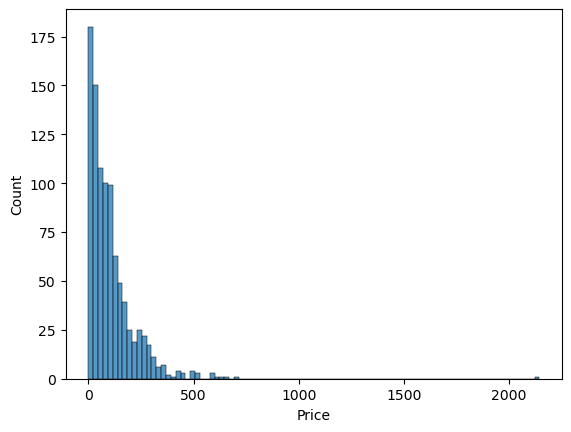

In [105]:
sns.histplot(df['Price'])

In [106]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
mdl_Price_vs_Unit = ols("Price ~ Unit",
                        data=df).fit()
print(mdl_Price_vs_Unit.params)


Intercept    134.708560
Unit          -2.749592
dtype: float64


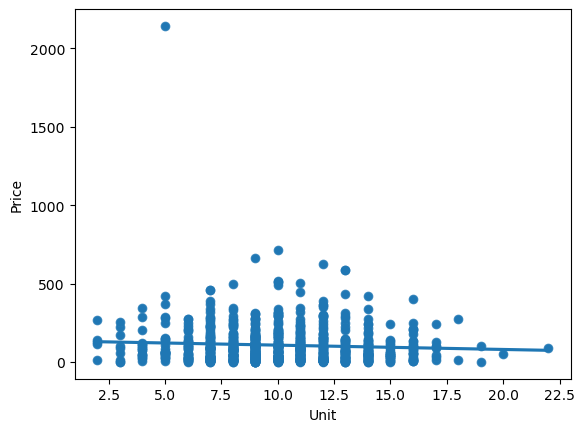

In [108]:
sns.scatterplot(x='Unit', y='Price', data=df)
sns.regplot(x='Unit', y='Price', data=df, ci=False)
plt.show()

In [112]:
import pandas as pd

In [115]:
grouped = df.groupby(['Product', 'Region'])['Unit'].sum().reset_index()
result = grouped.groupby('Region').apply(lambda x: x.loc[x['Unit'].idxmax()])
print(result)
#in this aspect, it can shows which product is most popular item in different region.

              Product     Region  Unit
Region                                
Region_1   Product_13   Region_1  46.0
Region_10  Product_14  Region_10  56.0
Region_2   Product_43   Region_2  40.0
Region_3   Product_41   Region_3  50.0
Region_4   Product_31   Region_4  79.0
Region_5   Product_48   Region_5  54.0
Region_6    Product_8   Region_6  49.0
Region_7   Product_43   Region_7  42.0
Region_8    Product_4   Region_8  51.0
Region_9    Product_4   Region_9  60.0


In [116]:
import pandas as pd

In [117]:
grouped = df.groupby(['Product', 'Region'])['Unit'].sum().reset_index()
result = grouped.groupby('Region').apply(lambda x: x.loc[x['Unit'].idxmin()])
print(result)
#The worst sales of each product in different regions

              Product     Region  Unit
Region                                
Region_1   Product_27   Region_1   0.0
Region_10  Product_11  Region_10   0.0
Region_2   Product_18   Region_2   0.0
Region_3    Product_3   Region_3   3.0
Region_4   Product_29   Region_4   0.0
Region_5   Product_50   Region_5   0.0
Region_6   Product_29   Region_6   0.0
Region_7   Product_33   Region_7   3.0
Region_8   Product_21   Region_8   0.0
Region_9   Product_20   Region_9   0.0


In [118]:
import matplotlib.pyplot as plt

In [119]:
grouped = df.groupby('Region')['Unit'].sum()

In [120]:
top3_products = df[df['Region'].isin(grouped.nlargest(3).index)]

c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\dashuaibi\anaconda3\lib\site-packages\seaborn\algorithms.py:9

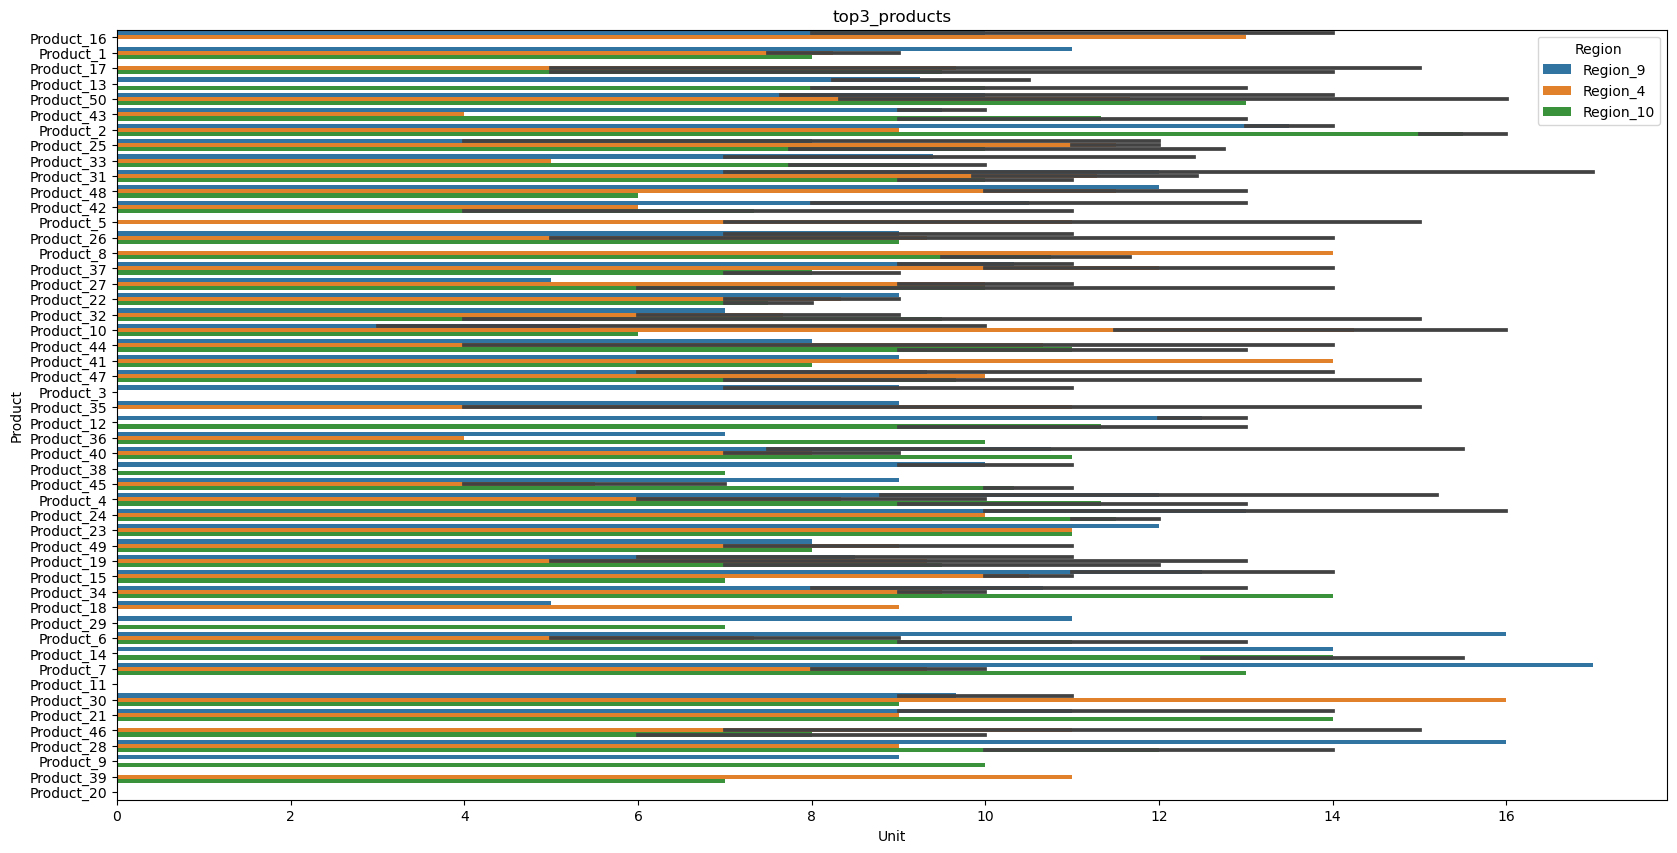

In [122]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Unit', y='Product', hue='Region', data=top3_products)
plt.xlabel('Unit')
plt.ylabel('Product')
plt.title('top3_products')
plt.legend(title='Region')
plt.show()

In [123]:
import pandas as pd

In [124]:
df['Date'] = pd.to_datetime(df['Date'])

KeyError: 'Date'